In [1]:
import pandas as pd
data = pd.read_csv('yearly.csv')
data.columns

Index(['Unnamed: 0', '2004.1', '2005.1', '2006.1', '2007.1', '2008.1',
       '2009.1', '2010.1', '2011.1', '2012.1', '2013.1', '2014.1', '2015.1',
       '2016.1', '2017.1', '2018.1', '2019.1', '2020.1', '2021.1', '2022.1'],
      dtype='object')

In [2]:
data = data.drop('Unnamed: 0', axis = 1)
data

,2004.1,2005.1,2006.1,2007.1,2008.1,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
0,0,0,0,0,0,0,0,"5,000","1,966",400,"10,025",275,0,0,0,0,0,0,0
1,0,66,0,134,0,0,"13,850","10,490",147,"3,917",0,0,0,32,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"54,000","41,330",0,0,"14,122"
3,0,0,0,0,127,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,"1,118","118,311","80,571",0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3983,0,0,0,0,0,0,0,0,0,0,"62,820","2,101",0,0,"89,000","11,903","4,337","5,462","82,000"
3984,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3985,0,0,0,0,0,0,0,0,0,"27,018","2,000",0,0,0,0,0,0,0,0
3986,0,0,0,0,0,0,0,0,0,0,0,0,0,"78,497",0,0,0,0,0


In [3]:
data = pd.melt(data)
data

,variable,value
0,2004.1,0
1,2004.1,0
2,2004.1,0
3,2004.1,0
4,2004.1,0
...,...,...
75767,2022.1,"82,000"
75768,2022.1,0
75769,2022.1,0
75770,2022.1,0


In [4]:
data = data.rename(columns = {'variable': 'Year', 'value': 'Quantity'})
data

,Year,Quantity
0,2004.1,0
1,2004.1,0
2,2004.1,0
3,2004.1,0
4,2004.1,0
...,...,...
75767,2022.1,"82,000"
75768,2022.1,0
75769,2022.1,0
75770,2022.1,0


In [5]:
import numpy as np
data['Quantity'] = data['Quantity'].replace({',': ''}, regex=True)
data['Quantity'] = data['Quantity'].astype(np.float32)

In [6]:
data = data.groupby('Year')['Quantity'].sum()
data

Year
2004.1          407.0
2005.1          369.0
2006.1         7705.0
2007.1       423432.0
2008.1      1972733.0
2009.1      2766875.0
2010.1      6783664.0
2011.1     12042245.0
2012.1     19076864.0
2013.1     31645696.0
2014.1     45184580.0
2015.1     41127368.0
2016.1     32149556.0
2017.1    106403160.0
2018.1     52611780.0
2019.1     69980888.0
2020.1    165367888.0
2021.1    162641664.0
2022.1    146232928.0
Name: Quantity, dtype: float32

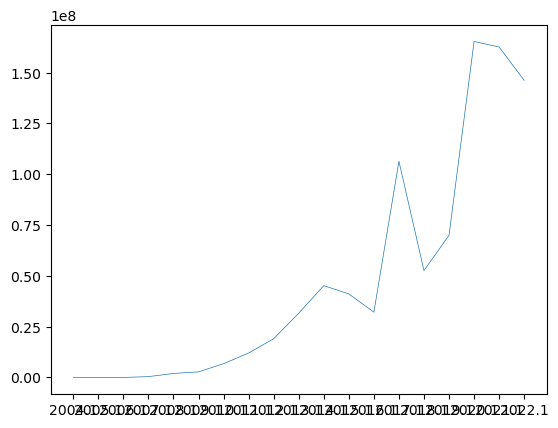

In [7]:
import matplotlib.pyplot as plt
plt.plot( data, linewidth = 0.5)
plt.show()

<AxesSubplot: xlabel='Year'>

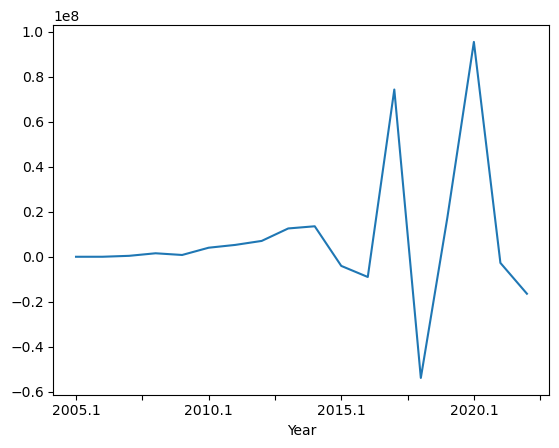

In [8]:
data = data.diff(periods = 1)
data = data.dropna()
data.plot()

In [9]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data)
adftest[1]

0.9522338300799945

<AxesSubplot: xlabel='Year'>

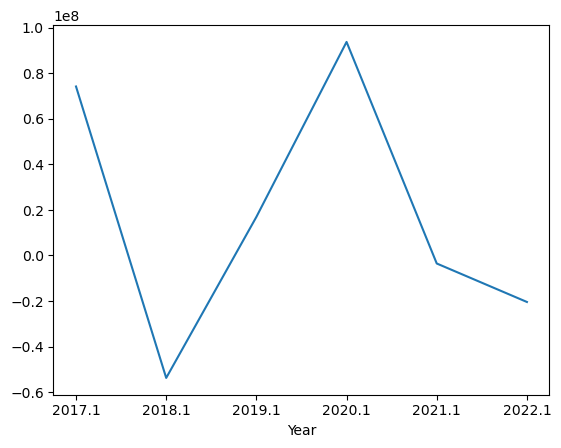

In [10]:
data = data.diff(periods = 12)
data = data.dropna()
data.plot()

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = np.array(data)
data=data.reshape(-1,1)
scaler.fit(data)
data = scaler.transform(data)
data

array([[ 1.0912123 ],
       [-1.3876166 ],
       [-0.01800233],
       [ 1.4703192 ],
       [-0.41433176],
       [-0.7415807 ]], dtype=float32)

In [12]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data)
adftest[1]

0.0